In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import layers

INPUT_SIZE = 10
LEARNING_RATE = 0.005

input = layers.Input(shape=(INPUT_SIZE,))
x = layers.Dense(10, activation='relu')(input)
x = layers.Dense(1, activation='tanh')(x)
F_curr_model = keras.Model(inputs=input, outputs=x)
F_prev_model = keras.Model(inputs=input, outputs=x)
F_curr_model.summary()

F_curr_model.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='mse')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [3]:
def gen_price_series(size=10000, k=3, a=0.9):
    p_series = np.ndarray((size,))
    b_series = np.ndarray((size,))
    p_series[0] = 0
    b_series[0] = 0

    for i in range(1, size):
        p_series[i] =  p_series[i - 1] + b_series[i - 1] + k * np.random.normal()
        b_series[i] = a * b_series[i - 1] + np.random.normal()

    R = np.max(p_series) - np.min(p_series)
    z_series = np.exp(p_series / R)

    return z_series

def calc_price_returns(zt):
    # returns the set rt, with the first element (0) being NaN
    rt = np.ndarray((zt.shape[0],))
    rt[0] = np.nan
    rt[1:] = zt[1:] - zt[:-1]
    return rt



def calc_return(mu, rt, Ft_curr, Ft_prev, rft=0, delta=0):
    '''Calculates the returns (Rt) on-line.'''

    return mu * (rft + Ft_prev * (rt - rft) - delta * tf.math.abs(Ft_curr - Ft_prev))

def calc_DSR(n, Rt, At_prev, Bt_prev):
    '''Calculates the differential Sharpe ratios (DSR, Dt) on-line.'''

    At_curr = At_prev + n * (Rt - At_prev)
    Bt_curr = Bt_prev + n * (Rt ** 2 - Bt_prev)

    dDt_dRt = (Bt_prev - At_prev * Rt) / ((Bt_prev - At_prev ** 2) ** 1.5)

    return dDt_dRt, At_curr, Bt_curr

In [4]:
def test_performance(zt, Ft):
    values = np.ones((zt.shape[0],))
    owned = False
    money = 1
    values[0] = money

    values_ideal = np.ones((zt.shape[0],))
    owned_ideal = False
    money_ideal = 1
    values_ideal[0] = money_ideal

    for t in range(INPUT_SIZE, SERIES_LENGTH - 1):

        # Model Ft
        if (Ft[t] > 0) and (not owned):
            # BUY
            owned = True
            money -= zt[t]
        elif (Ft[t] < 0) and owned:
            # SELL
            owned = False
            money += zt[t]
        
        # Ideal
        if (zt[t + 1] > zt[t]) and (not owned_ideal):
            # BUY
            owned_ideal = True
            money_ideal -= zt[t]
        elif (zt[t + 1] < zt[t]) and owned_ideal:
            # SELL
            owned_ideal = False
            money_ideal += zt[t]

        if owned:
            values[t] = money + zt[t]
        else:
            values[t] = money

        if owned_ideal:
            values_ideal[t] = money_ideal + zt[t]
        else:
            values_ideal[t] = money_ideal
    
    return (values[-1] / zt[-1], values_ideal[-1] / zt[-1]), (values, values_ideal)


In [5]:
# SERIES_LENGTH = 10000
# INPUT_SIZE = 10
# Ft = np.ones((SERIES_LENGTH,))
# zt = gen_price_series(size=SERIES_LENGTH, k=3, a=0.9)
# deltas, val_series = test_performance(zt, Ft)

# plt.plot(zt)
# plt.plot(val_series[0])
# plt.plot(val_series[1])

# a = val_series[1]

Episode:  0

SAAAAA========================
BASELINE output: tf.Tensor([[-0.87220865]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8727261]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8732822]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8731599]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.87346524]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8734485]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.87369925]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8748381]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8751863]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

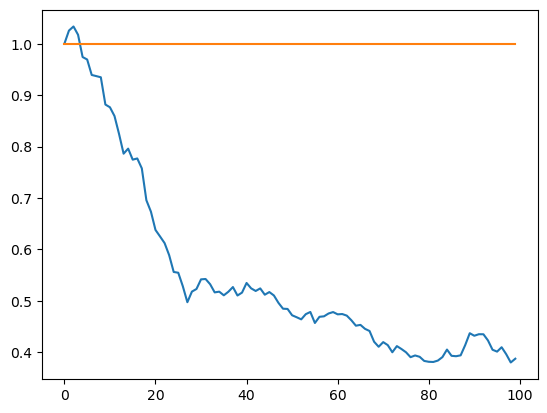

Episode:  1

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8819345]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8822191]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88251865]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88243973]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8825016]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88266844]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8828994]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88301706]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8825326]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

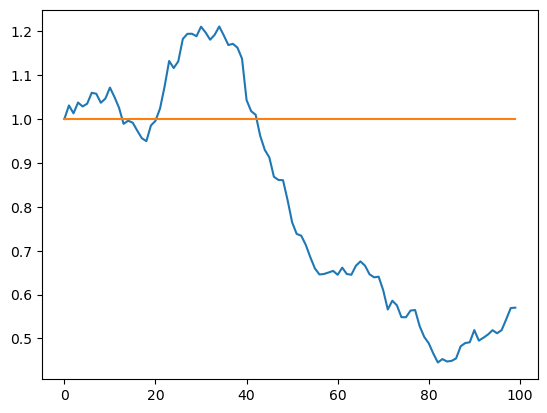

Episode:  2

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8878551]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88829154]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8882497]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8874903]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8875376]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88711315]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.886611]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88660854]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8867268]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: t

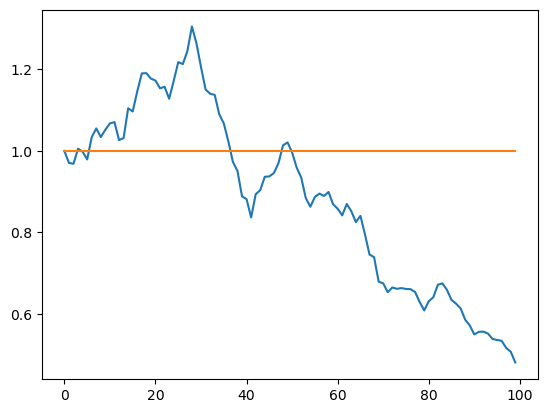

Episode:  3

SAAAAA========================
BASELINE output: tf.Tensor([[-0.897221]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.89734113]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.89767635]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.89754766]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.89735395]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8972037]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8971631]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8972439]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8976068]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

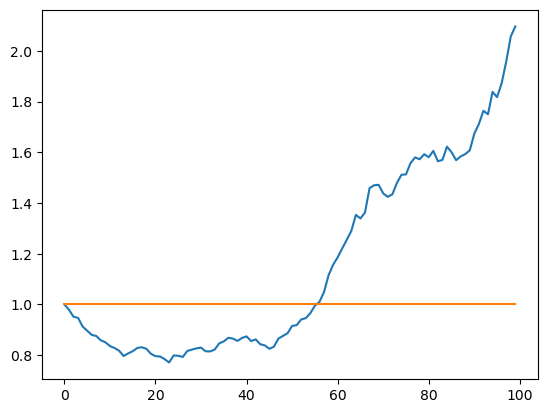

Episode:  4

SAAAAA========================
BASELINE output: tf.Tensor([[-0.887409]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88768137]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88760614]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8874303]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88760245]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8874141]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8872081]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88733435]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8878287]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

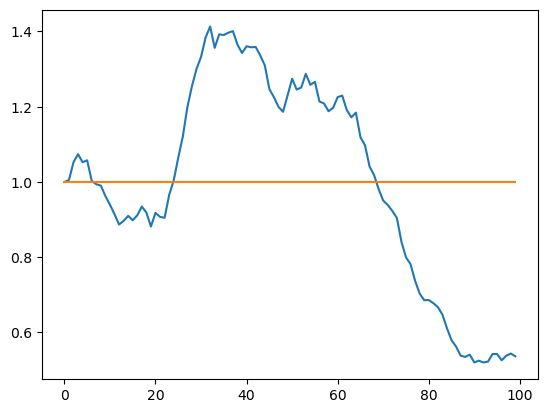

Episode:  5

SAAAAA========================
BASELINE output: tf.Tensor([[-0.89306885]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8931054]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8937405]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.89403486]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.89402914]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.89420104]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.89436984]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8940243]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8944952]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output

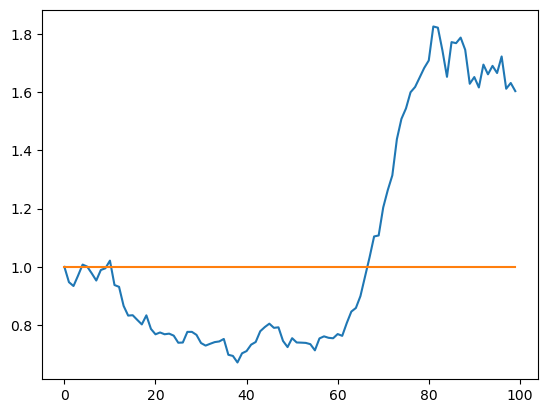

Episode:  6

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88056445]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8808961]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8806966]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88107294]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88137424]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88101614]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8813952]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8817487]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.88209206]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output

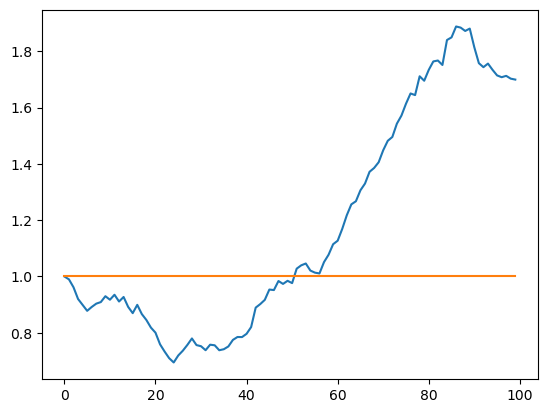

Episode:  7

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8694445]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8686945]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.86806434]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8675598]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.86756724]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8678784]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8678131]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8663046]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.86531115]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

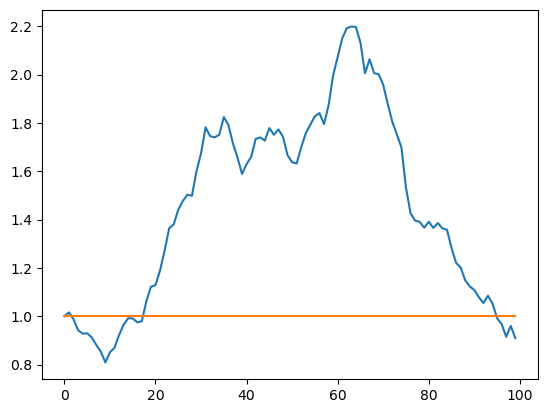

Episode:  8

SAAAAA========================
BASELINE output: tf.Tensor([[-0.86441344]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.86400056]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8638702]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8632506]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.863499]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.86355335]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8643692]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.86412746]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8641813]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

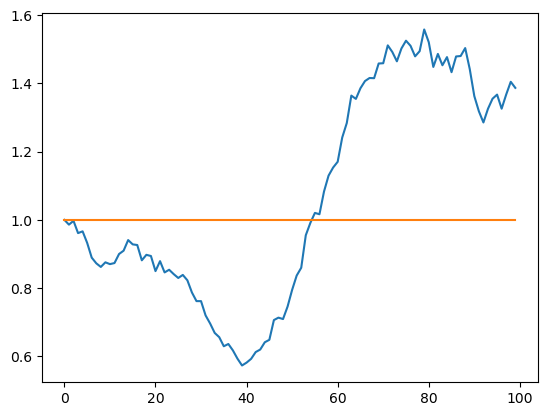

Episode:  9

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8495038]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8491301]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8480791]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8469347]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84627646]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84506005]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84427816]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84242123]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8418056]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

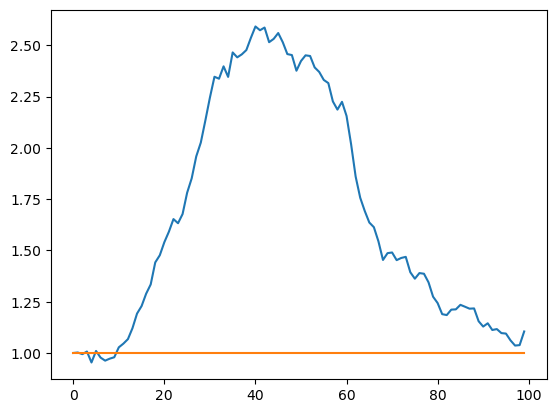

Episode:  10

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8413406]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84152514]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.841949]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84185845]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8430477]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8419984]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8427324]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.843205]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8427524]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf

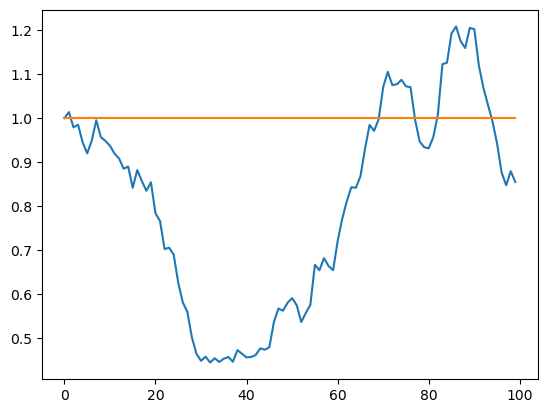

Episode:  11

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83595407]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8354814]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8345354]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83487463]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83436334]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83566135]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8347719]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.834222]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8343969]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

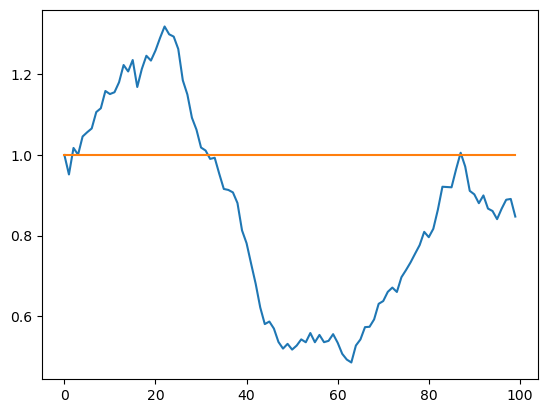

Episode:  12

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83575433]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8355537]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83496225]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83541596]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83514506]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8341795]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83319515]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.83278674]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8315619]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outp

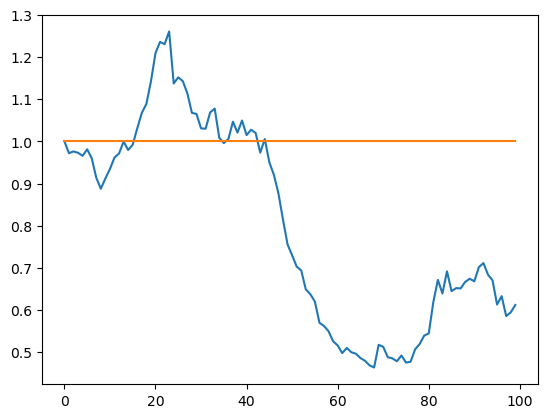

Episode:  13

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84278005]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8426479]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84368366]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8439725]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84359974]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84423333]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8447981]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8447215]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.84424263]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outpu

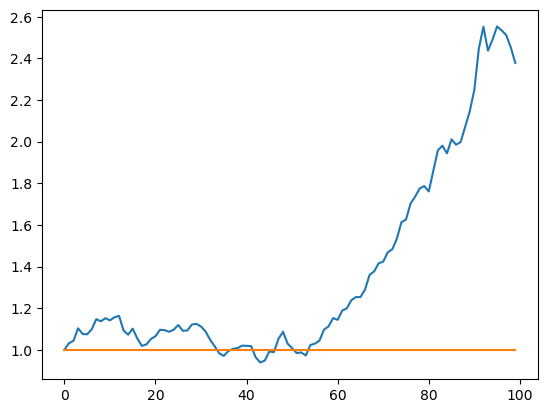

Episode:  14

SAAAAA========================
BASELINE output: tf.Tensor([[-0.82574445]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8258299]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8299695]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8296467]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8295503]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.82804304]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.82962626]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.82970446]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8297014]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output

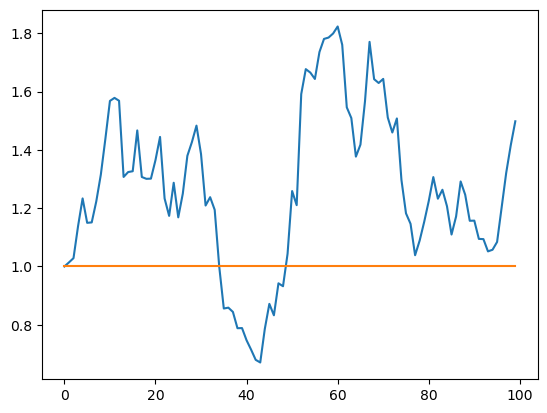

Episode:  15

SAAAAA========================
BASELINE output: tf.Tensor([[-0.800761]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8005363]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79975486]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79825574]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7969742]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7958564]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7949602]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79207927]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7912076]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

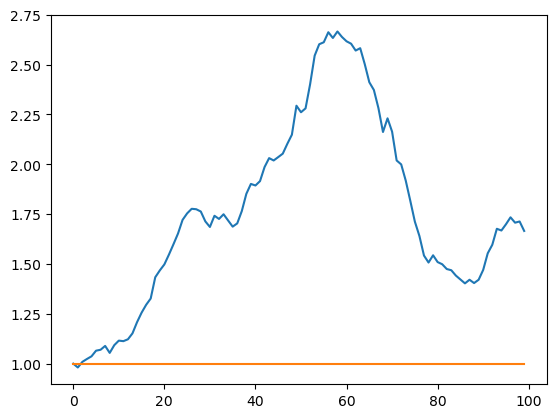

Episode:  16

SAAAAA========================
BASELINE output: tf.Tensor([[-0.77564216]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7736011]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7722363]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.76937824]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7685849]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7664127]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.76412845]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7636678]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.76368606]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output

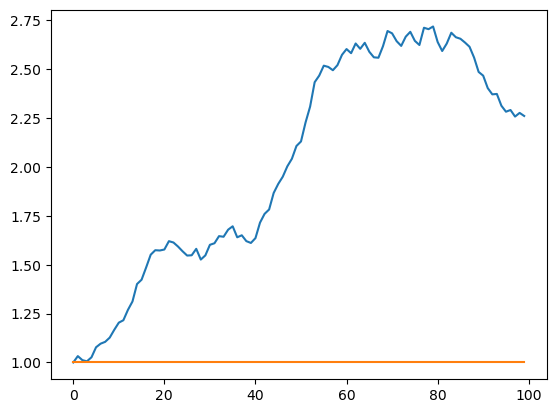

Episode:  17

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74992937]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.75129396]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7515627]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7539778]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7548436]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7548238]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7556489]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7569079]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7571494]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

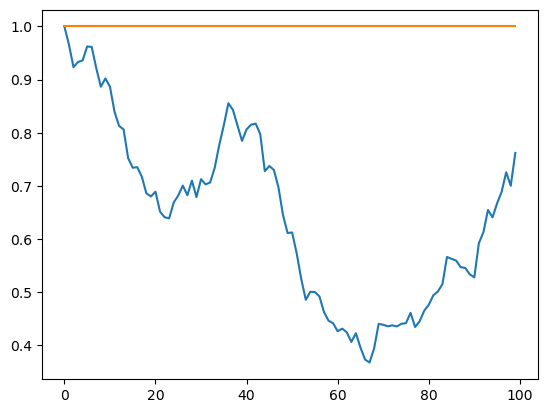

Episode:  18

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74946487]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74965215]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7503563]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7503448]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7514694]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7525803]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.75349414]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7539636]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.75503975]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output

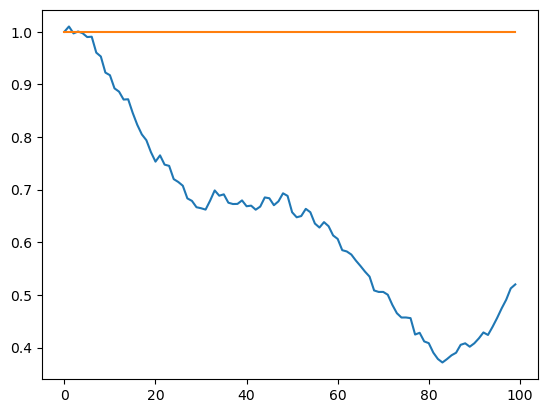

Episode:  19

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7697562]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7708257]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7707141]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.77054733]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7699398]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.76934826]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.76700765]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7672348]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7666216]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

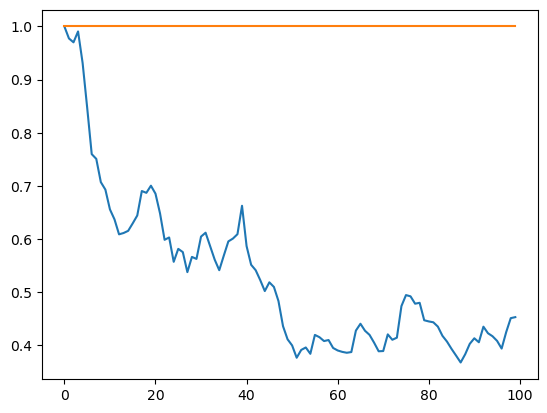

Episode:  20

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7808914]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7809869]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7825973]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.781679]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78113854]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78269064]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78163177]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.782937]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78551716]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

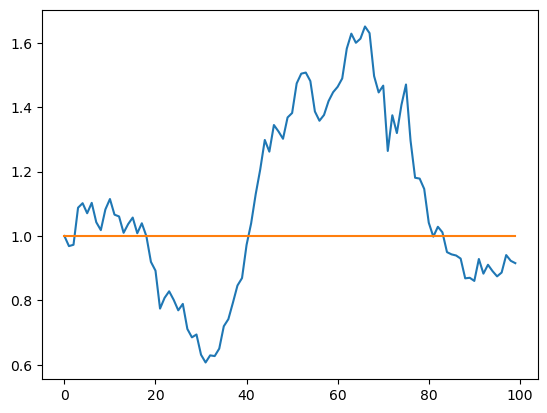

Episode:  21

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7761756]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7785725]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7784858]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.77654254]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7731986]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.77059674]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7676205]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7616464]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.76106334]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

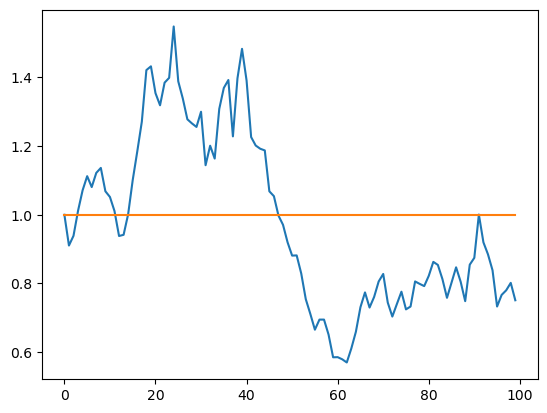

Episode:  22

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7855652]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79014903]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79205734]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79292125]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79402745]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79648083]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7949026]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7927004]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7928329]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outpu

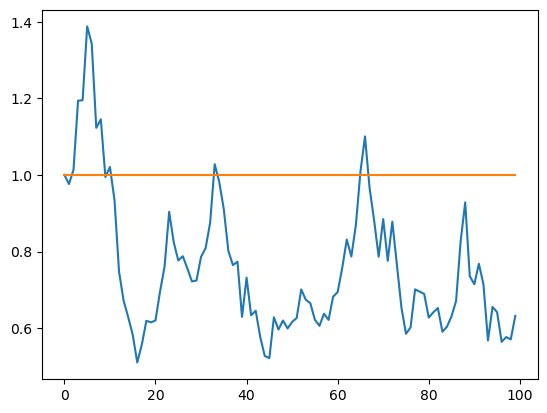

Episode:  23

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7911399]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79060346]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7891918]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78836364]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78418916]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78410923]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.782775]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7841138]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78730446]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output

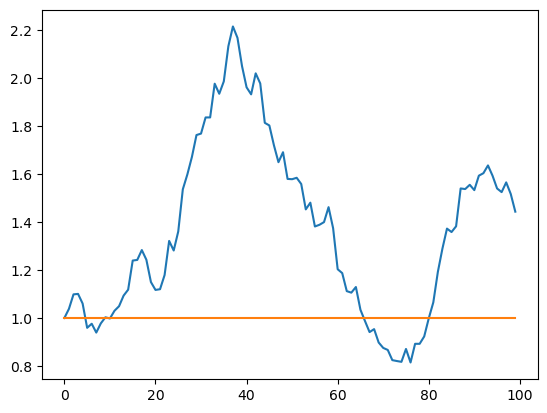

Episode:  24

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74725944]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7462884]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7476487]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74698263]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74502116]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74486244]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7461281]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74583054]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74642223]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outp

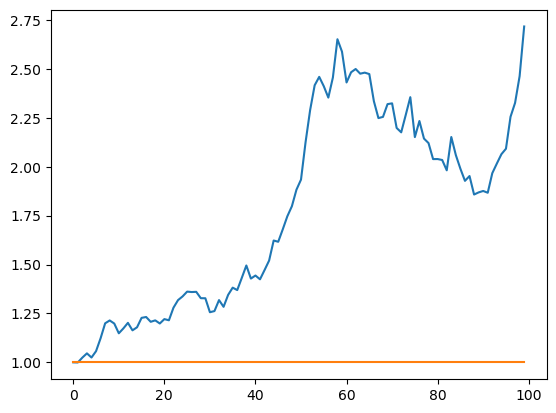

Episode:  25

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6782572]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6803576]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.680484]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6776761]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6828678]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.68131834]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6779095]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6715299]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.66533357]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: t

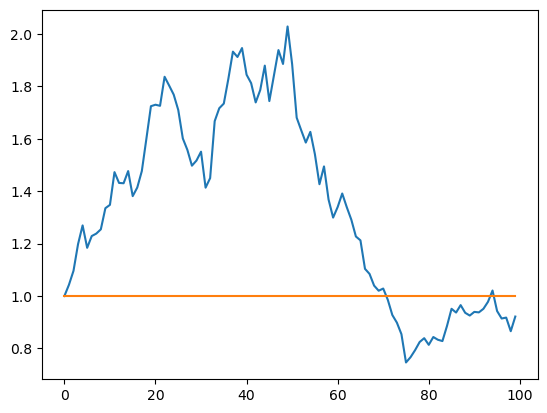

Episode:  26

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6989505]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6980945]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.69760054]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.697809]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6977058]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.69701296]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6930529]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6913142]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6911627]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: t

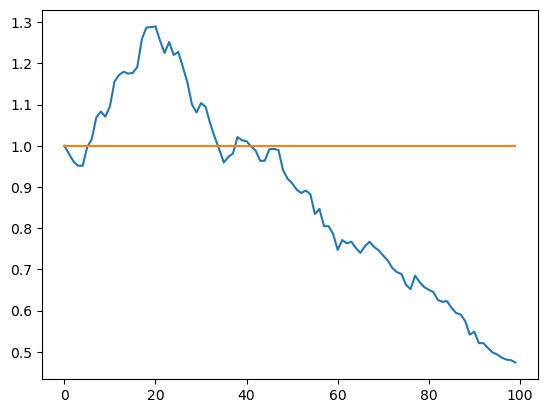

Episode:  27

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7474376]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74892706]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7510323]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7534291]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.75341994]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.75370413]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7535151]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7551425]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7549089]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

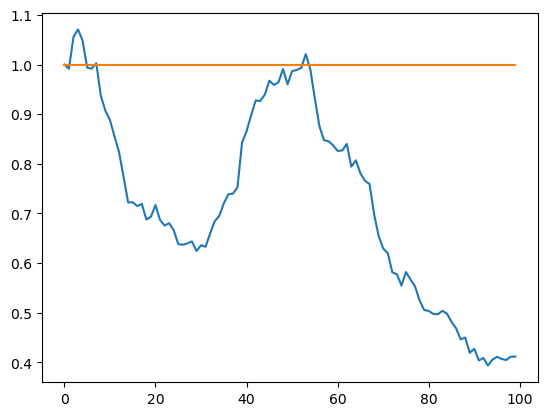

Episode:  28

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7732868]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7739995]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.77582985]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7760958]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7777934]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7779883]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78047746]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.781587]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.78301275]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

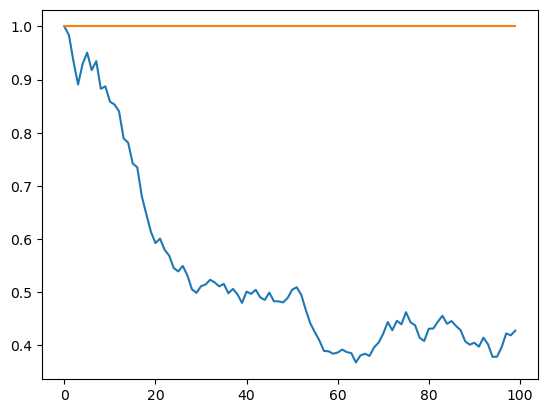

Episode:  29

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79470277]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7942655]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79670143]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.795285]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79694515]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7995794]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7998263]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8005563]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.80044734]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

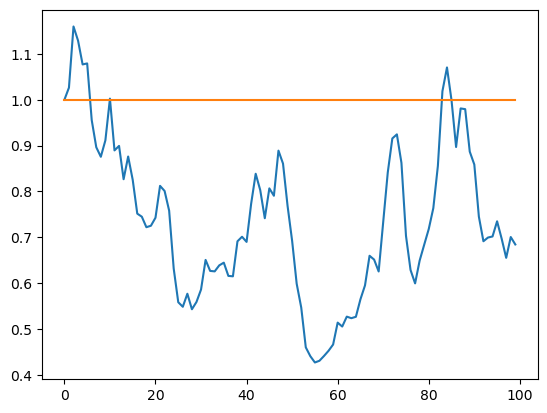

Episode:  30

SAAAAA========================
BASELINE output: tf.Tensor([[-0.80336744]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.80407536]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.8028627]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79806495]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79841876]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7985631]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79581946]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.79438406]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7928405]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outp

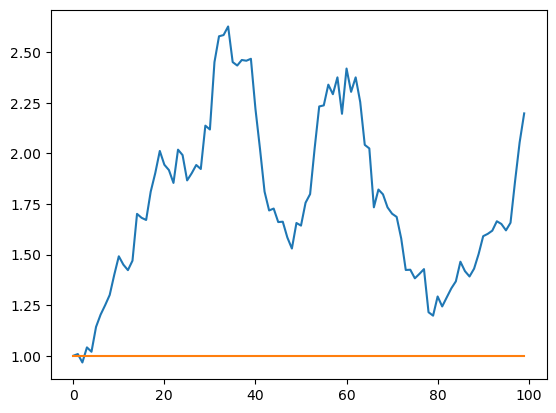

Episode:  31

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7681125]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7677708]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7672422]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7620188]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7615046]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7621757]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7606059]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7602018]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.76182884]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: t

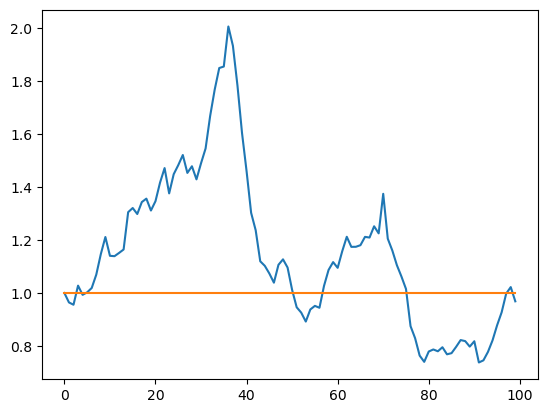

Episode:  32

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7605388]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7603421]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7608532]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.76084775]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7611071]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.761389]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.76042056]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7603525]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7603955]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: t

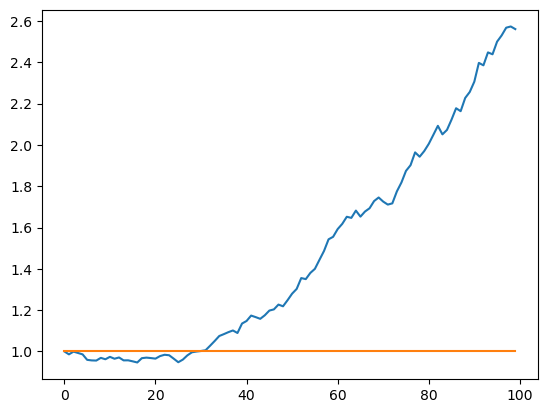

Episode:  33

SAAAAA========================
BASELINE output: tf.Tensor([[-0.69961274]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.70168996]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7005384]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7008178]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6994244]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.70136964]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7016416]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7031585]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7062134]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

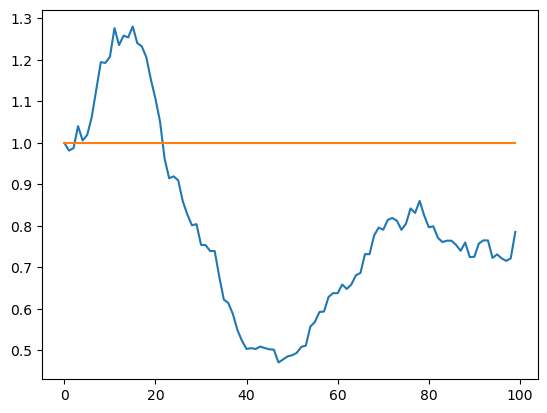

Episode:  34

SAAAAA========================
BASELINE output: tf.Tensor([[-0.72254664]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.72586435]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.72739357]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.729059]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7299081]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7306701]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7325694]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.73369837]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.734339]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

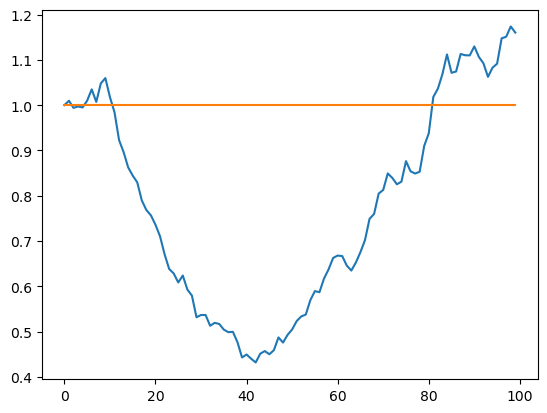

Episode:  35

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6982319]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.70194155]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.702813]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.70437837]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.70595723]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7063008]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7084012]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7103634]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7103737]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

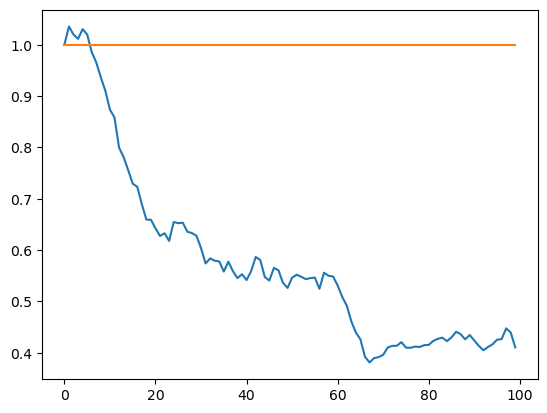

Episode:  36

SAAAAA========================
BASELINE output: tf.Tensor([[-0.73163474]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.73127943]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7325562]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7325498]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.73369056]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.73516166]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.73580307]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.73578763]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7363641]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outp

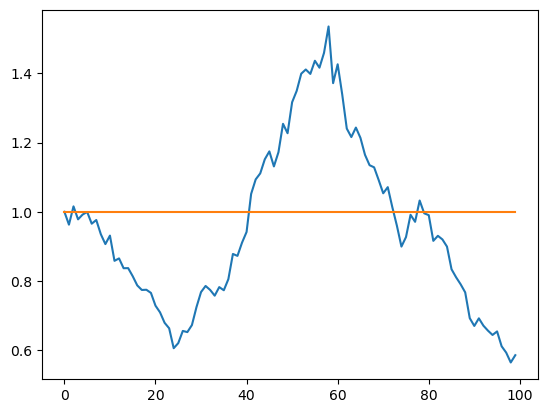

Episode:  37

SAAAAA========================
BASELINE output: tf.Tensor([[-0.74726766]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7487969]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7481869]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7489373]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7503153]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7501767]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7510035]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.75246894]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.75507224]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

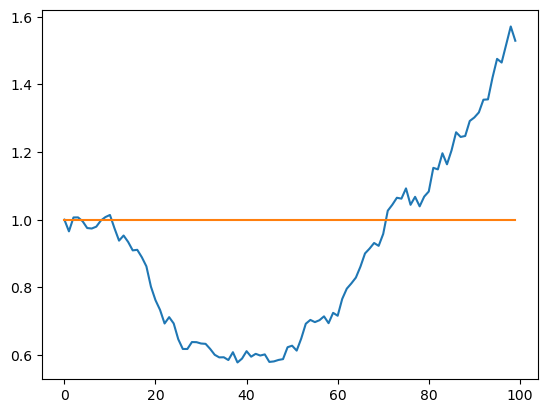

Episode:  38

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7004651]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7025654]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6995913]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.70433104]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7043369]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7050207]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7081366]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.70721877]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.7040583]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: 

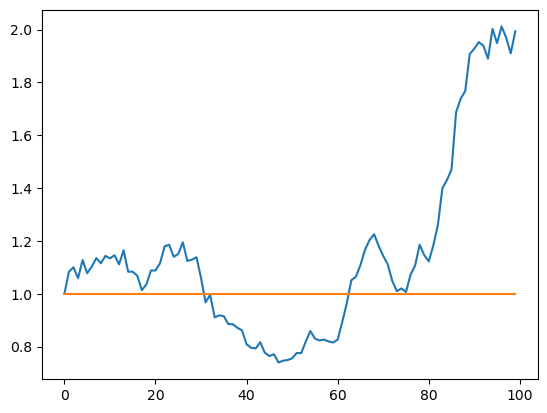

Episode:  39

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6089535]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6060765]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.60905755]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6072693]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6027441]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.6044623]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.60123765]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.59814644]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.5926657]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

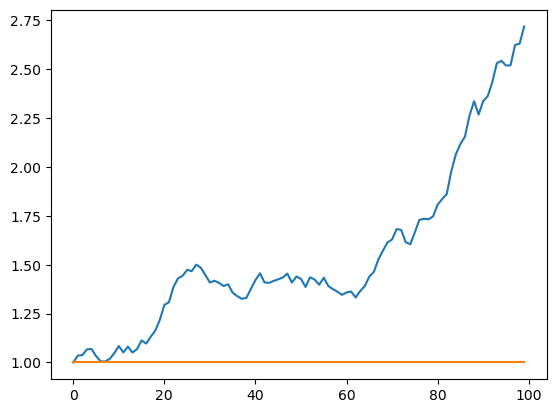

Episode:  40

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3207521]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.31852356]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3138751]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.31942403]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3161426]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.32035396]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.32519445]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.33585286]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.33866912]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outp

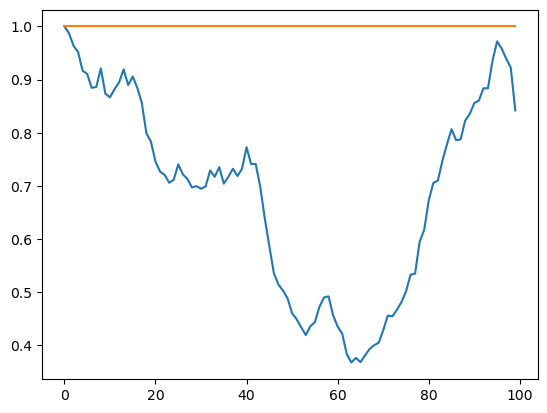

Episode:  41

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3191479]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3117668]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3340295]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3309117]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.31774747]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.30811086]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.29787657]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.2842926]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.31558266]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output

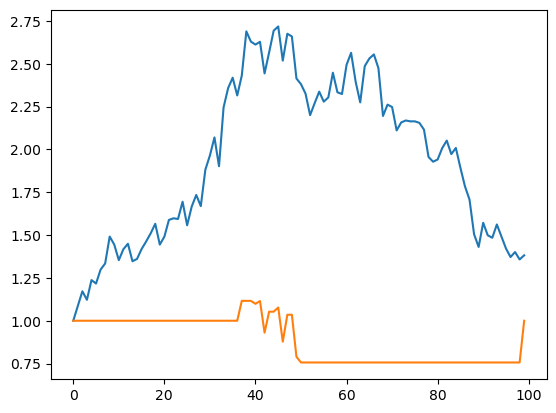

Episode:  42

SAAAAA========================
BASELINE output: tf.Tensor([[-0.42996392]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.41131267]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3850987]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4340704]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4552776]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.43769047]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.43773276]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.44632992]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.46587837]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outp

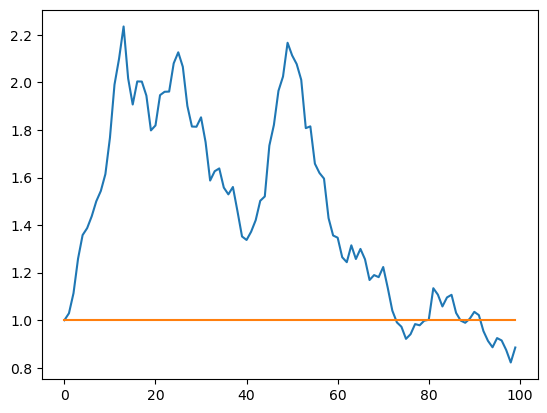

Episode:  43

SAAAAA========================
BASELINE output: tf.Tensor([[-0.57867205]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.58256274]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.5809815]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.58294785]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.58279765]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.5865778]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.58547586]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.5840963]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.5859465]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outpu

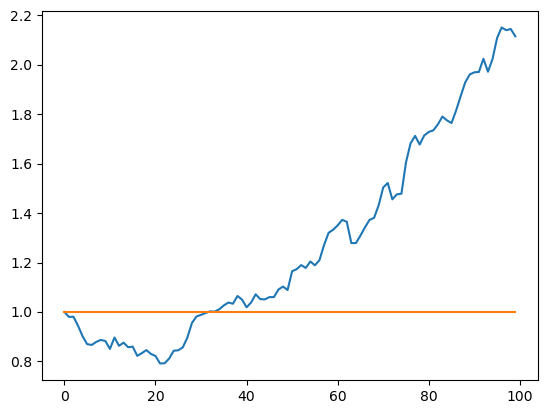

Episode:  44

SAAAAA========================
BASELINE output: tf.Tensor([[-0.36458647]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.34556472]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3310061]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.31378877]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.34040657]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.32813546]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.32995585]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.33378983]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.31481963]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE ou

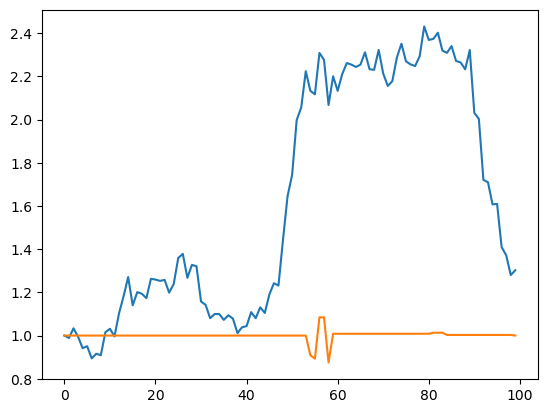

Episode:  45

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4099348]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4219117]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.41889888]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.41844082]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.41121882]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.40929142]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4123565]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.40802675]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.41514766]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outp

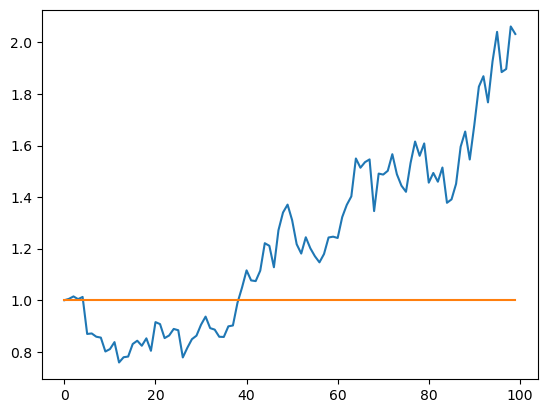

Episode:  46

SAAAAA========================
BASELINE output: tf.Tensor([[-0.0658915]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.06611323]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.06116221]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.05836339]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.06044207]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.06382029]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.06251635]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.06440265]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.07096438]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE ou

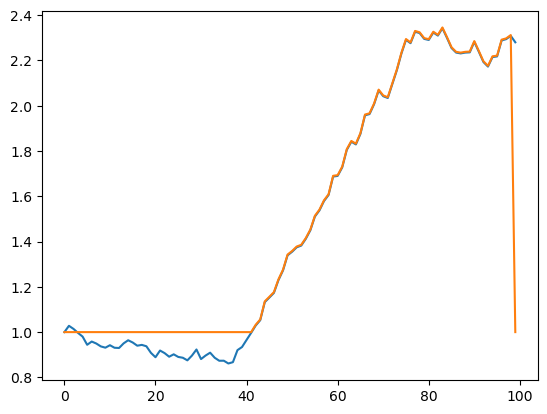

Episode:  47

SAAAAA========================
BASELINE output: tf.Tensor([[0.39466888]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.3922956]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.39150617]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.39168152]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.38617083]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.37687007]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.37430972]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.3715801]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.37003002]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.T

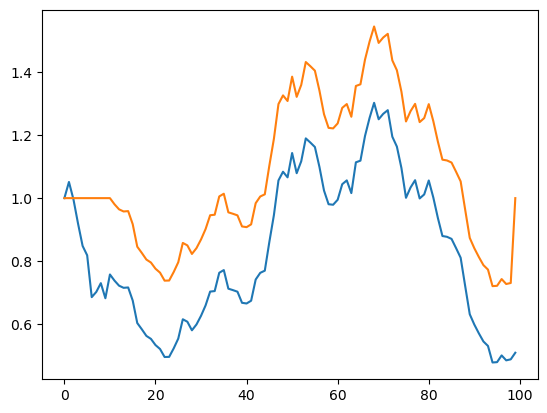

Episode:  48

SAAAAA========================
BASELINE output: tf.Tensor([[0.2979243]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.29433212]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.29310077]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.29431933]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.29371607]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.28560755]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.28043148]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.27880606]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.27647454]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.

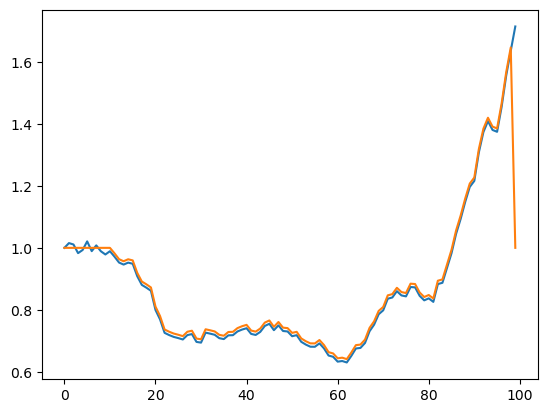

Episode:  49

SAAAAA========================
BASELINE output: tf.Tensor([[0.47994986]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.47801784]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.47430265]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.47594142]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.47314304]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.47336656]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.47087547]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.470612]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.46699458]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.T

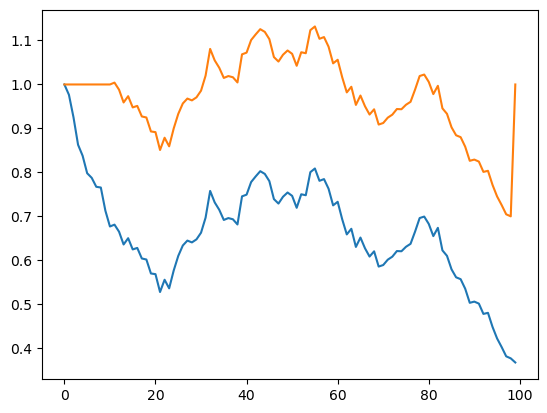

Episode:  50

SAAAAA========================
BASELINE output: tf.Tensor([[0.42467073]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.41751182]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.41364026]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4083678]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4065524]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4077681]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4132125]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.41296902]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.41890508]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Ten

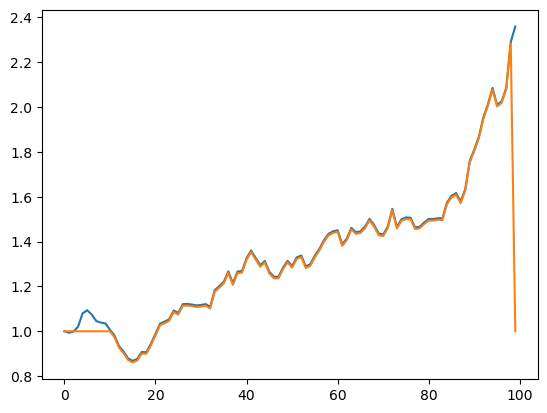

Episode:  51

SAAAAA========================
BASELINE output: tf.Tensor([[0.63339233]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.63300157]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6316266]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6275219]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.62562174]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6236461]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.625881]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.62654185]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6243657]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tenso

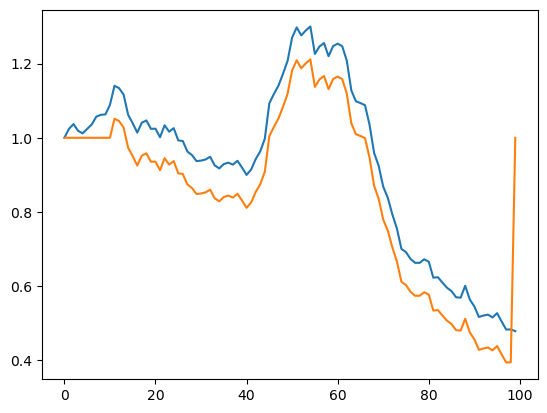

Episode:  52

SAAAAA========================
BASELINE output: tf.Tensor([[0.55037415]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5517646]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5560787]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5613329]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5654262]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5709846]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5726969]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5749658]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5751242]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor(

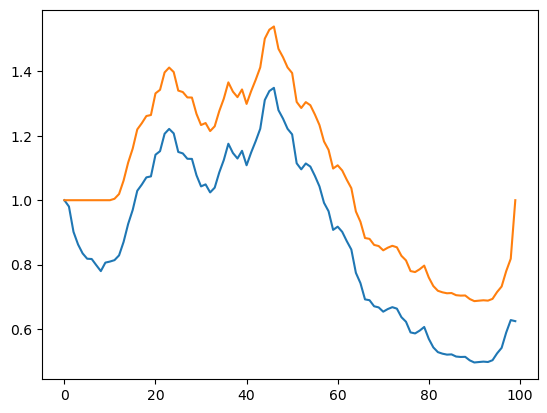

Episode:  53

SAAAAA========================
BASELINE output: tf.Tensor([[0.50605947]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5026949]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5053324]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5053437]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.50266683]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.50253016]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.49998304]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.50226116]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.49956283]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Te

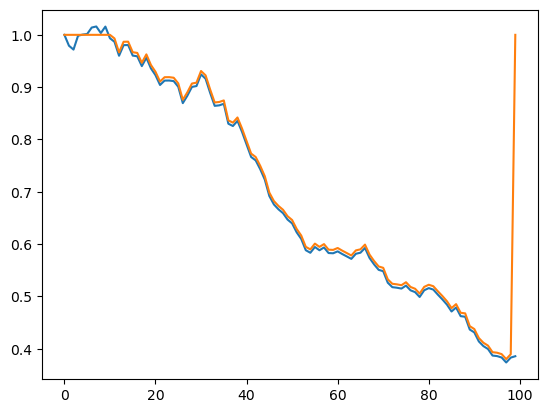

Episode:  54

SAAAAA========================
BASELINE output: tf.Tensor([[0.43225083]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.43715316]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.43669608]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4277728]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.42526102]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.42173234]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.42831388]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.43328965]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.43585724]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.

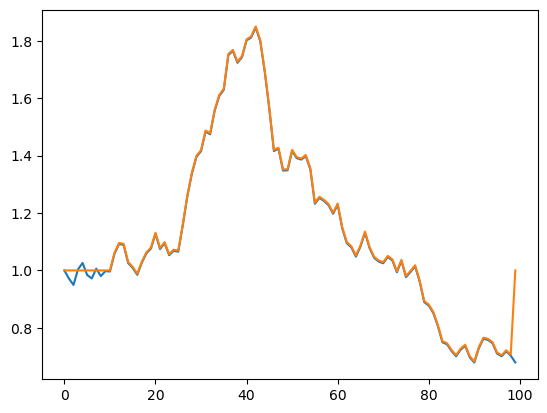

Episode:  55

SAAAAA========================
BASELINE output: tf.Tensor([[0.313906]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.31598863]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.31550357]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.32297498]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.3308583]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.32881525]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.34131977]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.33735326]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.32664037]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Te

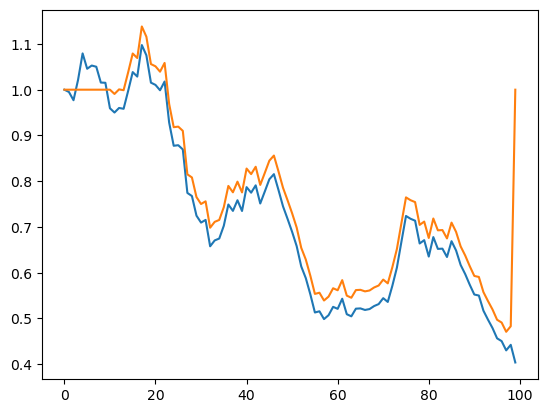

Episode:  56

SAAAAA========================
BASELINE output: tf.Tensor([[0.19263649]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.19609289]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.20384008]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.21945778]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.2158304]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.19576316]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.2000244]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.17739214]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.17446452]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.T

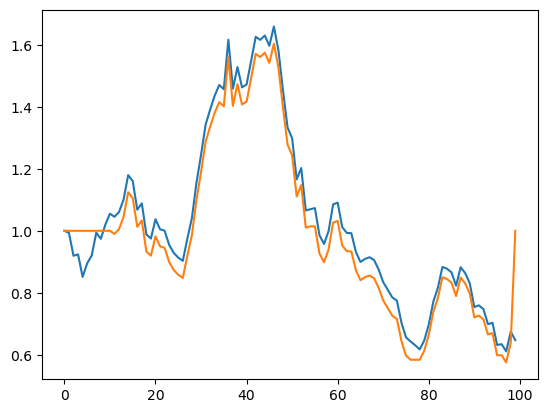

Episode:  57

SAAAAA========================
BASELINE output: tf.Tensor([[0.00900874]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.01387521]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.00335784]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.00155803]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.00891073]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.01552038]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.01503383]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.02002967]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.02192634]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outp

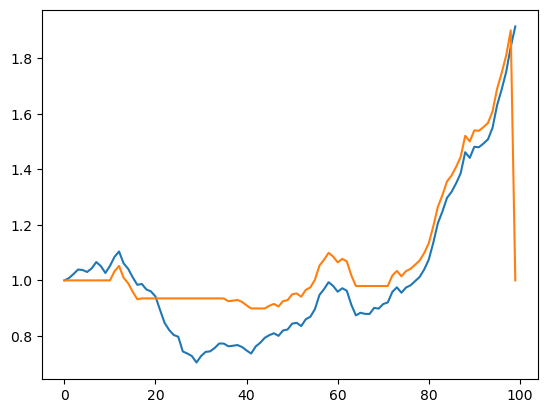

Episode:  58

SAAAAA========================
BASELINE output: tf.Tensor([[0.3295657]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.30634445]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.32233712]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.3268042]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.31835243]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.31374022]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.3055505]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.30265597]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.30185091]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Te

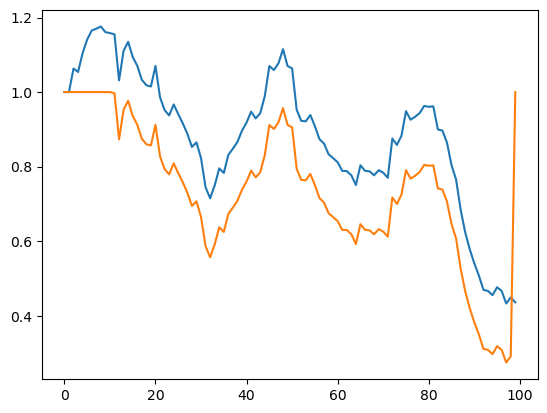

Episode:  59

SAAAAA========================
BASELINE output: tf.Tensor([[0.14037104]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.13257919]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.11472633]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.10596867]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.10338017]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.10839906]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.10136442]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.09783495]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.11312094]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf

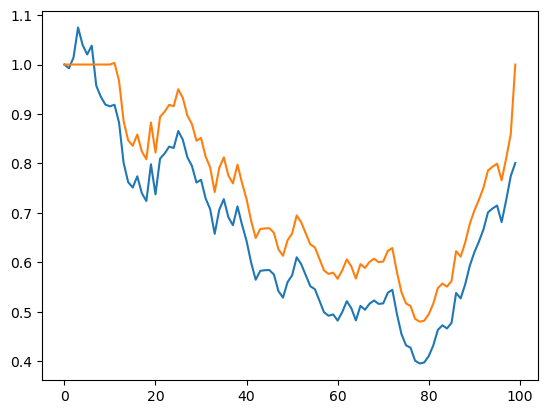

Episode:  60

SAAAAA========================
BASELINE output: tf.Tensor([[0.12032866]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.12105565]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.11524043]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.11259009]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.10963476]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.10452157]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.10452784]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.10605081]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.10118895]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf

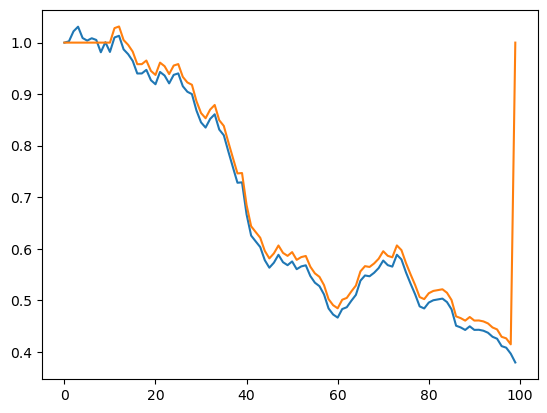

Episode:  61

SAAAAA========================
BASELINE output: tf.Tensor([[-0.02113697]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.00786901]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.01122518]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.02419436]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.02913825]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.03677363]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.04017571]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.03549111]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.04354731]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE o

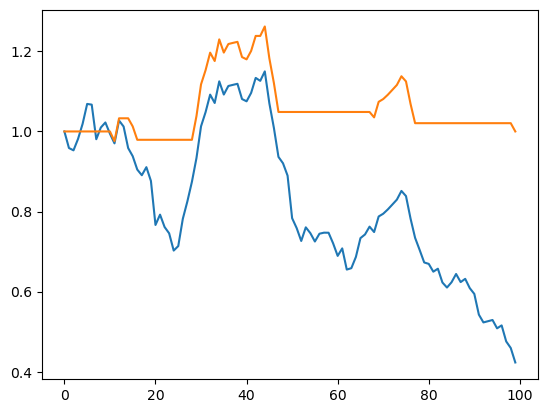

Episode:  62

SAAAAA========================
BASELINE output: tf.Tensor([[-0.18680896]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.18791066]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.18589161]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.1889346]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.19721691]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.19927667]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.20074639]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.2058887]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.20200993]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE out

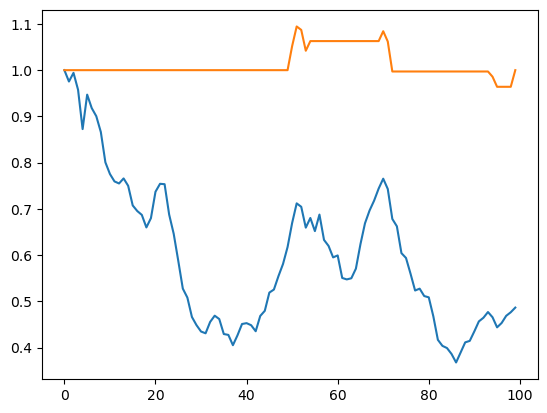

Episode:  63

SAAAAA========================
BASELINE output: tf.Tensor([[-0.2509143]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.24459426]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.24304922]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.23985782]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.2257768]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.23186801]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.22587565]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.22385564]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.22478959]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE out

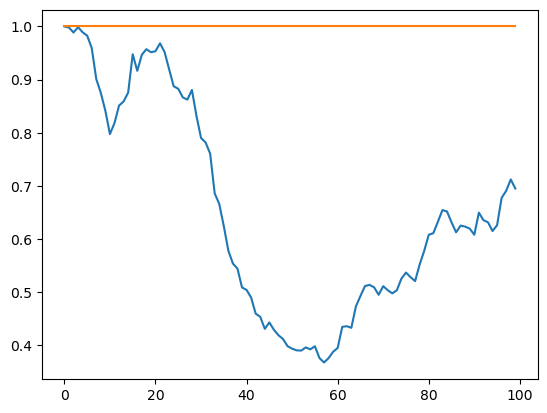

Episode:  64

SAAAAA========================
BASELINE output: tf.Tensor([[-0.27842703]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.27968833]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.28064463]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.280026]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.2799371]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.2792786]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.2806466]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.28056496]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.2848429]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output:

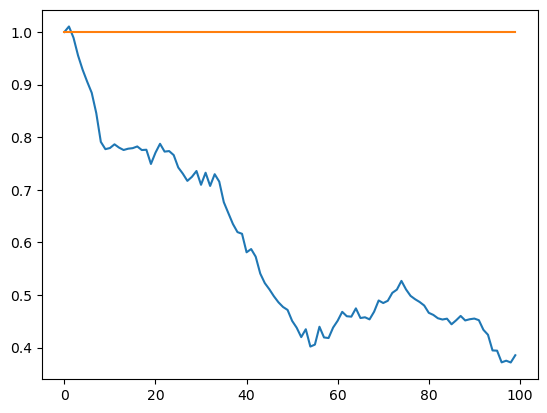

Episode:  65

SAAAAA========================
BASELINE output: tf.Tensor([[-0.35582498]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3648267]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.37434492]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.38212064]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.37849316]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.38311806]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.38352928]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.3790135]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.37411502]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE out

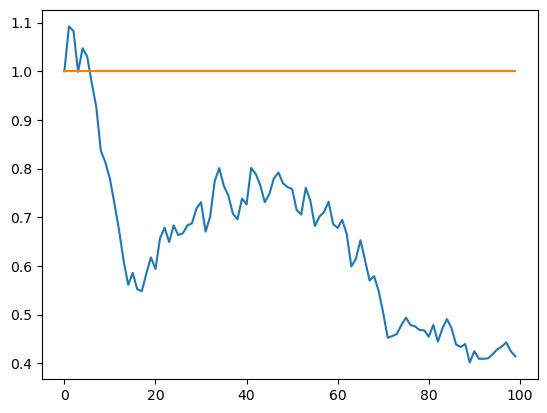

Episode:  66

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4279397]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4153488]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.43878856]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4208038]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.45365182]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4597924]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.48705456]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.48715207]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.49216443]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE outpu

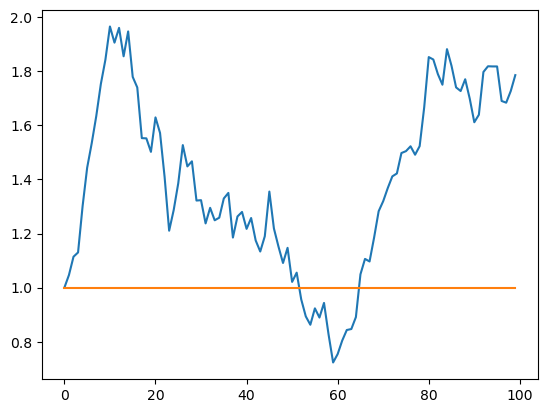

Episode:  67

SAAAAA========================
BASELINE output: tf.Tensor([[-0.41846126]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4172423]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.415707]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.41408336]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.42102572]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4253416]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.42965704]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.4294935]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[-0.42957187]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output

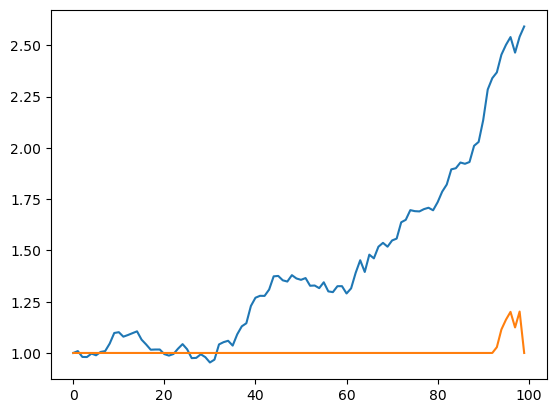

Episode:  68

SAAAAA========================
BASELINE output: tf.Tensor([[0.24790002]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.23958476]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.2423318]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.22682925]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.22517557]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.21417317]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.21774006]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.21780905]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.21362774]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.

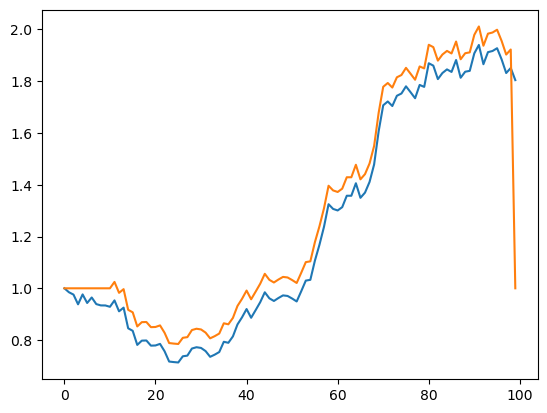

Episode:  69

SAAAAA========================
BASELINE output: tf.Tensor([[0.44800165]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.44608718]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.44509864]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4421484]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.44020125]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.43437603]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.43210652]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.42920402]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.42552203]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.

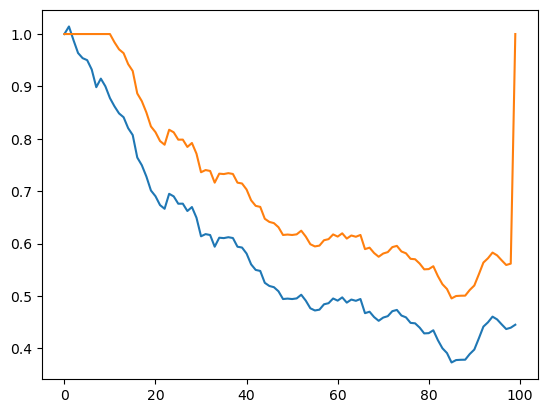

Episode:  70

SAAAAA========================
BASELINE output: tf.Tensor([[0.395037]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.39409813]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4133825]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.41330215]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4144017]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.42545107]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4274215]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.4263456]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.43836933]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tenso

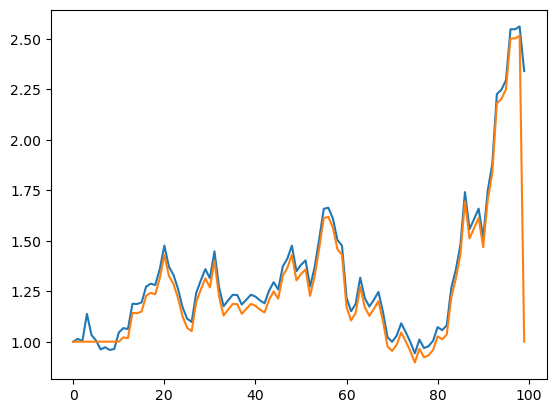

Episode:  71

SAAAAA========================
BASELINE output: tf.Tensor([[0.6086059]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6071917]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6041622]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.60442626]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.60389787]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6028532]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6010723]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.59694374]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.5948002]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tenso

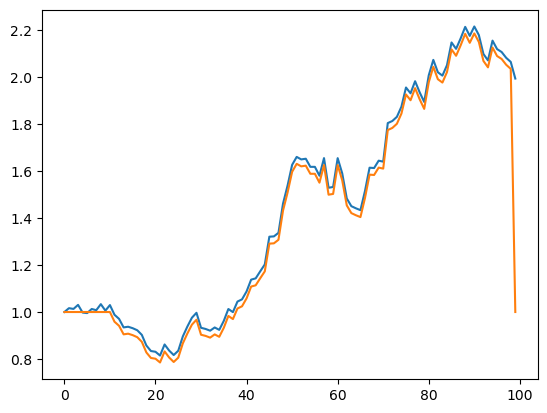

Episode:  72

SAAAAA========================
BASELINE output: tf.Tensor([[0.6791206]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6774831]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6779229]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6843933]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6822718]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6807959]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.68076646]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.67844737]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6798023]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor

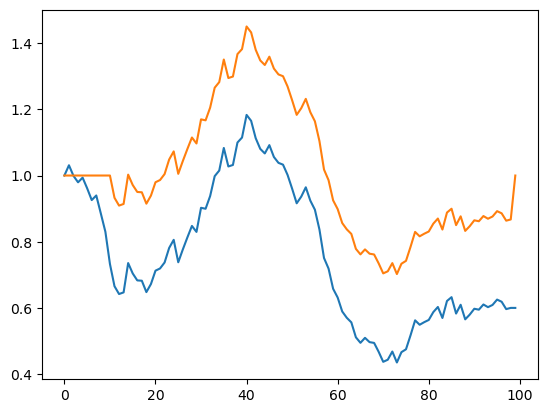

Episode:  73

SAAAAA========================
BASELINE output: tf.Tensor([[0.6689402]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6706436]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.67211187]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6746928]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.67721754]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6784413]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6692148]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.66486794]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.6637327]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tenso

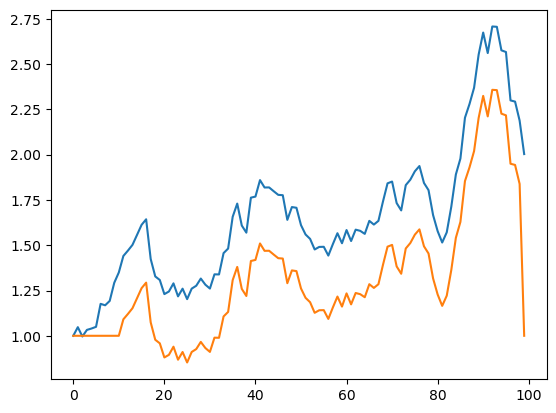

Episode:  74

SAAAAA========================
BASELINE output: tf.Tensor([[0.7203489]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7201256]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.72111106]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7220179]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.72270274]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.72308576]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.724255]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.72636884]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.72714305]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tens

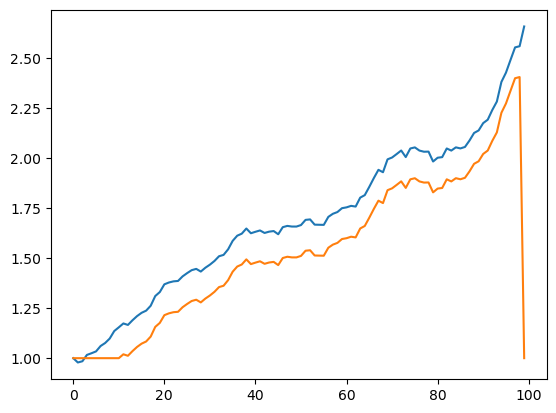

Episode:  75

SAAAAA========================
BASELINE output: tf.Tensor([[0.75871533]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.75597376]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7548977]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7525986]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.75118107]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.75103617]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.74877167]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7471158]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7455878]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Ten

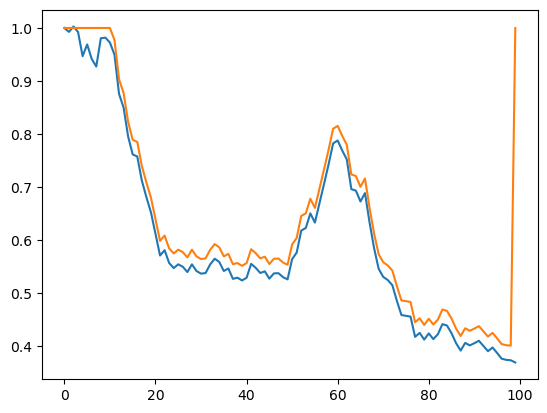

Episode:  76

SAAAAA========================
BASELINE output: tf.Tensor([[0.72747415]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.72830814]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7289317]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7298602]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7289616]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7291382]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7281273]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.727853]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7275593]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor(

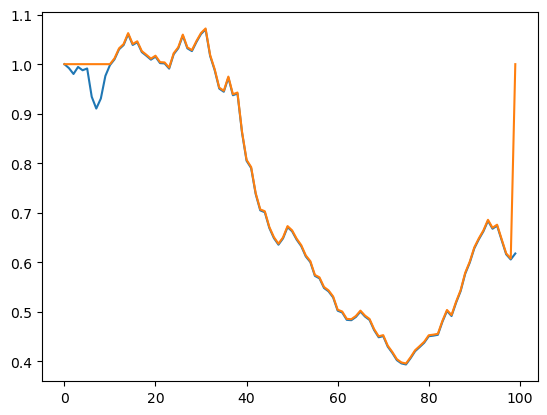

Episode:  77

SAAAAA========================
BASELINE output: tf.Tensor([[0.7034865]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.70274323]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.70092106]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7019153]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7026627]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7048524]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7068112]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7073291]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7084014]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor

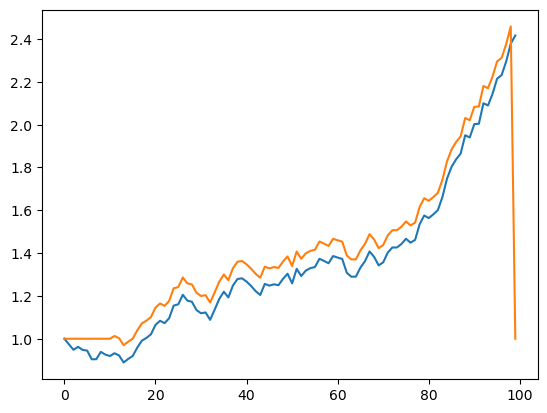

Episode:  78

SAAAAA========================
BASELINE output: tf.Tensor([[0.7575927]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.75808746]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.75689423]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.75370187]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7519867]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7494903]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.74818134]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7475995]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7474876]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tens

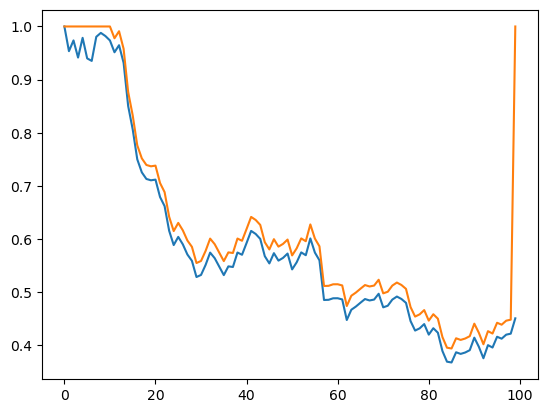

Episode:  79

SAAAAA========================
BASELINE output: tf.Tensor([[0.7334798]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7340208]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7345038]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.73491615]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7355659]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.73526424]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.73572725]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7362142]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.73671776]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tens

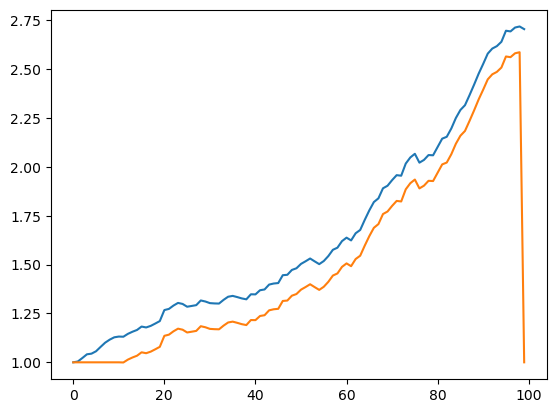

Episode:  80

SAAAAA========================
BASELINE output: tf.Tensor([[0.771814]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7723614]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7727445]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7733454]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77448976]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7756079]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7760861]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77717876]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.777788]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([

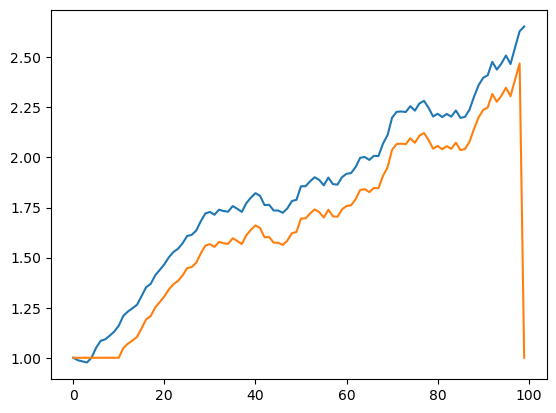

Episode:  81

SAAAAA========================
BASELINE output: tf.Tensor([[0.79676265]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7971801]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.79792255]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7994746]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8003192]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8011091]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.80111486]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.80111825]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8013686]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tens

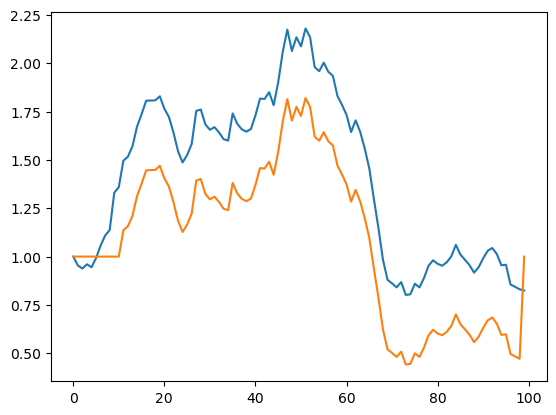

Episode:  82

SAAAAA========================
BASELINE output: tf.Tensor([[0.7796881]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7792196]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7791068]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77944225]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77928966]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77871406]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7786153]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7789687]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7788815]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tenso

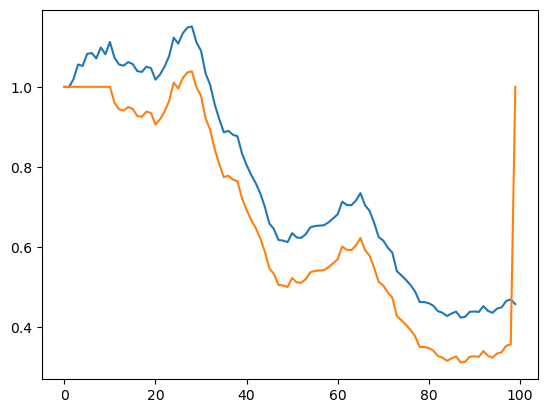

Episode:  83

SAAAAA========================
BASELINE output: tf.Tensor([[0.75141704]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7530228]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7526694]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.75393313]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7567979]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7578329]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7585233]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.75967485]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7606052]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tenso

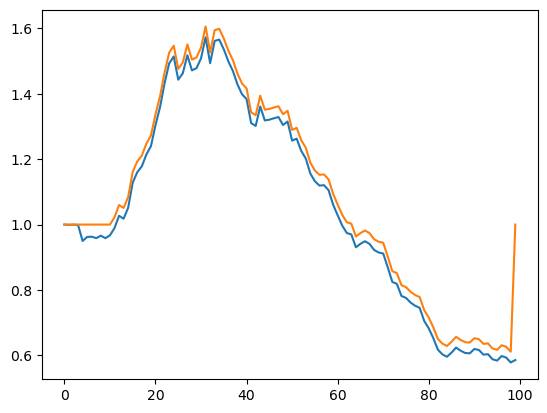

Episode:  84

SAAAAA========================
BASELINE output: tf.Tensor([[0.72103125]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7216556]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.72262627]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7232451]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7283176]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7281059]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7317471]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7375232]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7403661]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor

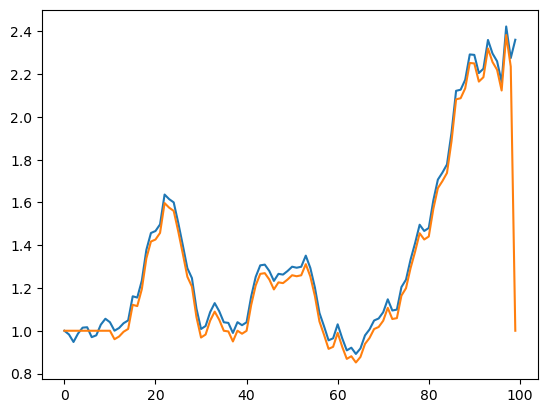

Episode:  85

SAAAAA========================
BASELINE output: tf.Tensor([[0.77141386]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77214503]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7740363]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7737851]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.774412]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77423036]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77162606]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7719516]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7742318]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tenso

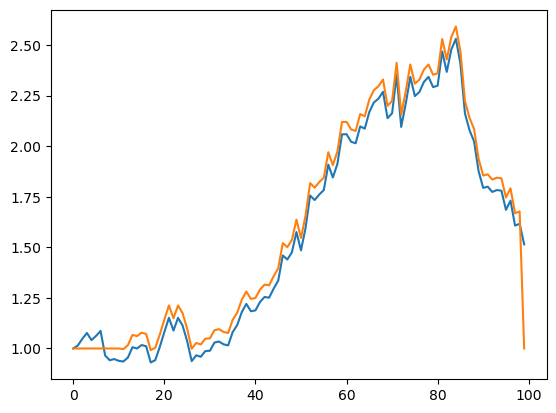

Episode:  86

SAAAAA========================
BASELINE output: tf.Tensor([[0.7892414]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7887192]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7877722]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7864081]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7864248]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7854131]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.78462154]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7842854]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7827981]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor(

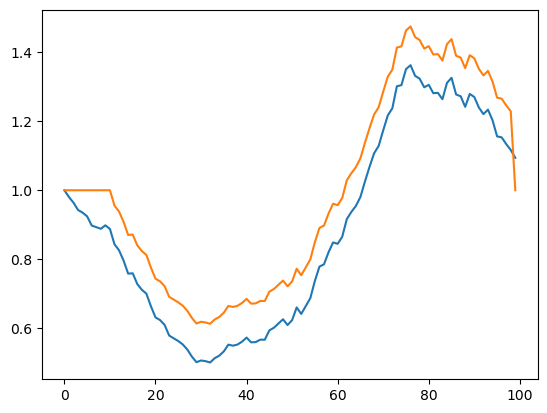

Episode:  87

SAAAAA========================
BASELINE output: tf.Tensor([[0.7985388]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7993509]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.800721]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8001646]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8006712]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8006025]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7995775]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7984428]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.79744434]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([

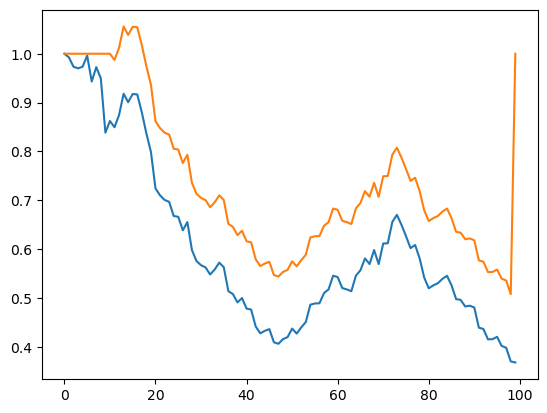

Episode:  88

SAAAAA========================
BASELINE output: tf.Tensor([[0.7764806]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77649975]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77534926]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77379245]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77440006]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77282417]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77169746]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7693942]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.76784426]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.T

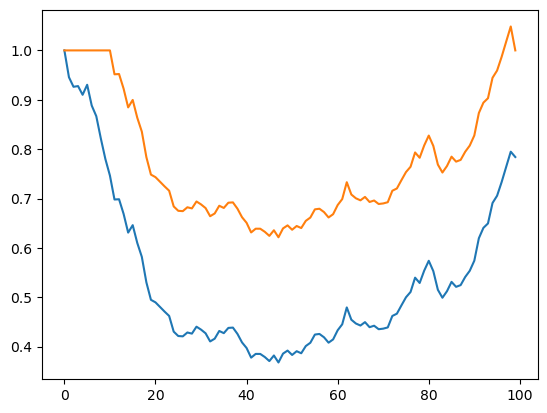

Episode:  89

SAAAAA========================
BASELINE output: tf.Tensor([[0.782357]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7828335]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.78185415]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7804749]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77972656]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7786003]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77922106]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7791157]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.77974117]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tenso

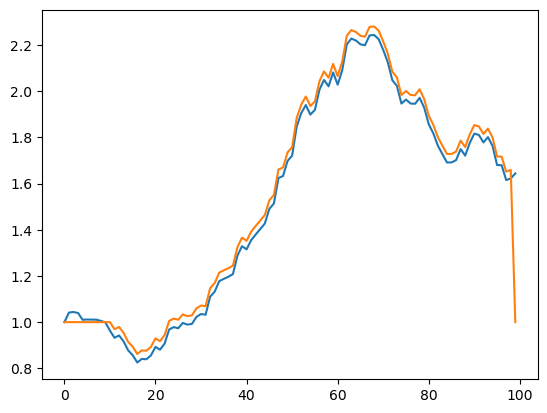

Episode:  90

SAAAAA========================
BASELINE output: tf.Tensor([[0.80051243]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7991103]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.79946554]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7994667]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.79967594]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8007576]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.800267]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.800004]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.79909253]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor

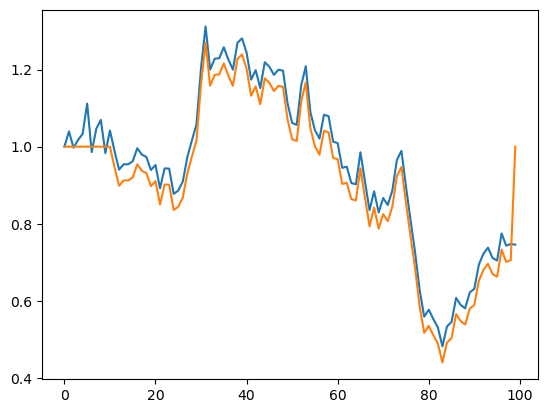

Episode:  91

SAAAAA========================
BASELINE output: tf.Tensor([[0.79225314]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.79250073]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7920068]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7914411]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.78956556]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.78865534]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7882529]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7878063]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.78761536]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Ten

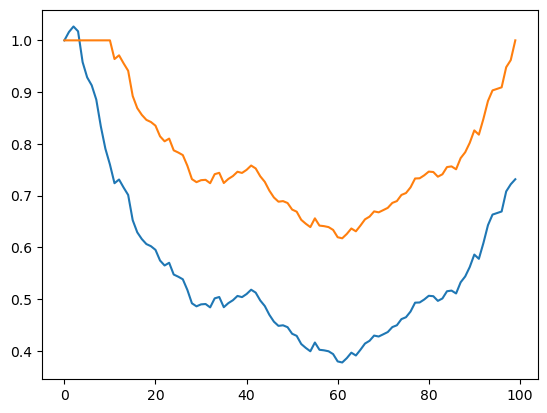

Episode:  92

SAAAAA========================
BASELINE output: tf.Tensor([[0.7926055]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7911137]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.79073226]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.78937453]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.78936434]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7894657]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.79084325]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7905472]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.7889162]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tens

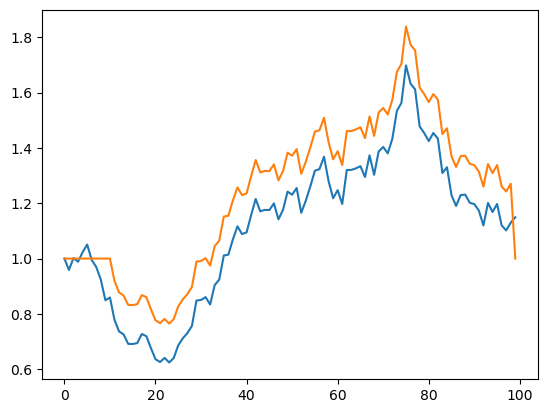

Episode:  93

SAAAAA========================
BASELINE output: tf.Tensor([[0.8059218]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.80476797]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.80454844]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.80261856]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8022202]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8019233]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.80214906]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.80109984]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.80203706]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Te

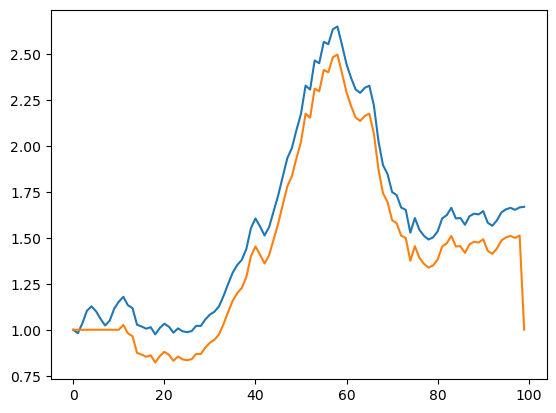

Episode:  94

SAAAAA========================
BASELINE output: tf.Tensor([[0.81836]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.81844485]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8190605]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.81884426]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.81922424]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8192234]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.82027406]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8197979]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8205955]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor

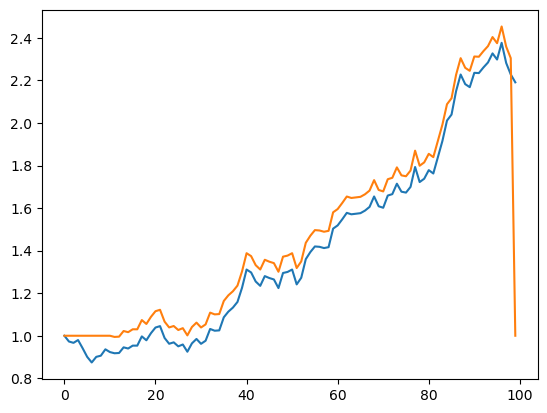

Episode:  95

SAAAAA========================
BASELINE output: tf.Tensor([[0.83720803]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8374987]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.83713186]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8372324]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8359195]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8360077]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8358698]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.83504707]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.83468926]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tens

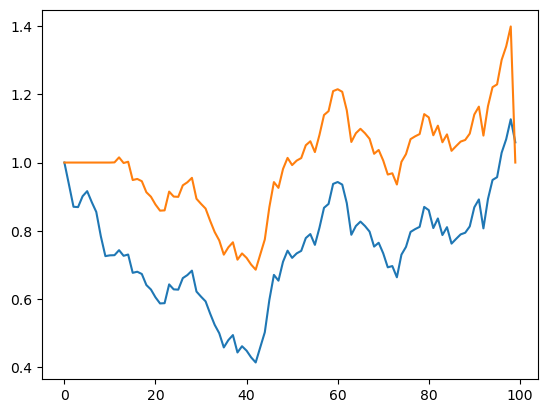

Episode:  96

SAAAAA========================
BASELINE output: tf.Tensor([[0.8476637]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8471677]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.847497]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8464226]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8463096]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.84643996]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8469771]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.84709406]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8470912]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor(

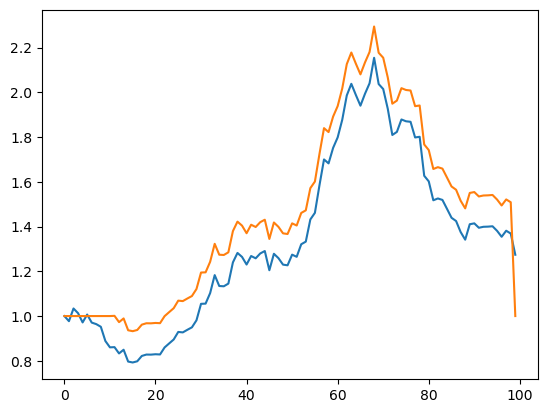

Episode:  97

SAAAAA========================
BASELINE output: tf.Tensor([[0.8556467]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8557277]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8559701]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8560549]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8559297]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.85581106]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.85593164]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.855471]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.85527474]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor

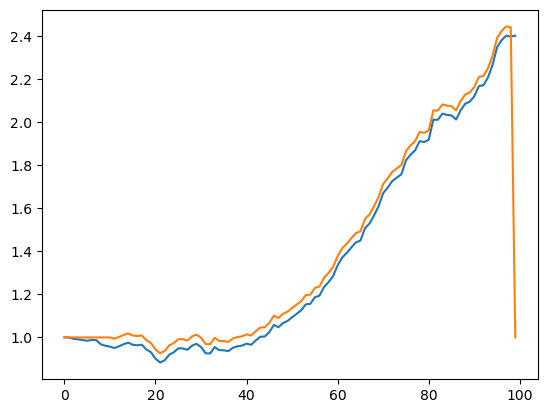

Episode:  98

SAAAAA========================
BASELINE output: tf.Tensor([[0.8668789]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8668515]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.86664975]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.86654735]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8666917]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8666302]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.86677325]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.86615646]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.86634654]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Ten

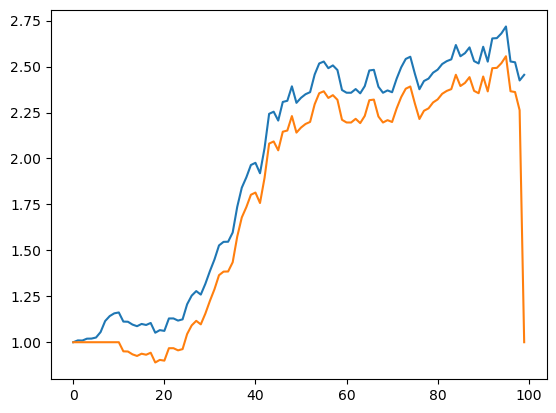

Episode:  99

SAAAAA========================
BASELINE output: tf.Tensor([[0.87404615]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.87508005]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8752784]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.87532175]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8751844]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.87513185]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.87467253]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8746161]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Tensor([[0.8745297]], shape=(1, 1), dtype=float32)

SAAAAA========================
BASELINE output: tf.Ten

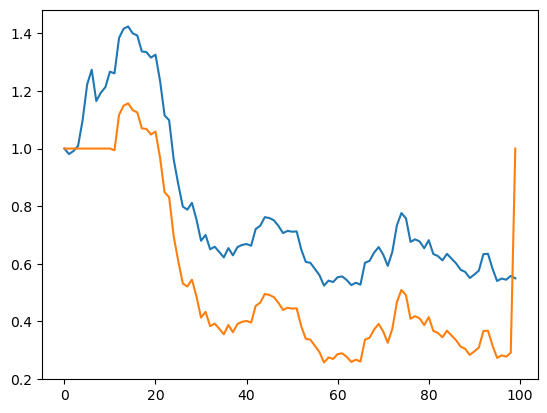

In [6]:
# GENERATION VARS

MU = 3
N = 0.01
RISKFREE_RETURN = 0
TRANS_COST = 0.1
SERIES_LENGTH = 100
K = 3
A = 0.9

EPISODES = 100

BASELINE_SERIES = gen_price_series(size=SERIES_LENGTH, k=K, a=A)

for ep in range(EPISODES):
    print("Episode: ", ep)

    # generate price series
    zt = gen_price_series(size=SERIES_LENGTH, k=K, a=A)
    rt = calc_price_returns(zt)
    Ft = np.zeros((SERIES_LENGTH,))

    At = np.zeros((SERIES_LENGTH,))
    Bt = np.ones((SERIES_LENGTH,))


    # plt.plot(zt)
    # plt.show()


    for t in range(INPUT_SIZE, SERIES_LENGTH):
        with tf.GradientTape(persistent=True) as tape:
            # prediction, set new position
            F_curr = F_curr_model(zt[t - INPUT_SIZE + 1:t + 1].reshape(1, INPUT_SIZE))
            F_prev = F_prev_model(zt[t - INPUT_SIZE:t].reshape(1, INPUT_SIZE)) # On the first iteration, this does not exist and is not used.
            Ft[t] = F_curr

            # if the first iteration, F(t-1) does not yet exist so no update can be made.
            F_prev_model.set_weights(F_curr_model.get_weights())
            # calculate the gradient
            Rt = calc_return(MU, rt[t], F_curr, F_prev)
            dDt_dRt, At[t], Bt[t] = calc_DSR(N, Rt, At[t - 1], Bt[t - 1])

        # calculate derivatives.
        dRt_dFcurr = tape.gradient(Rt, F_curr)
        dRt_dFprev = tape.gradient(Rt, F_prev)
        dFcurr_dThetacurr = tape.gradient(F_curr, F_curr_model.trainable_variables)
        dFprev_dThetaprev = tape.gradient(F_prev, F_prev_model.trainable_variables)

        # Set F(t-1) to F(t) for the next iteration.
        F_prev_model.set_weights(F_curr_model.get_weights())

        # print(len(F_curr_model.trainable_variables))
        
        if t != INPUT_SIZE:
            # multiply derivatives together.
            gradient_update = []
            for i in range(len(dFcurr_dThetacurr)):
                grad = dDt_dRt * (dRt_dFcurr * dFcurr_dThetacurr[i] + dRt_dFprev * dFprev_dThetaprev[i])
                grad *= LEARNING_RATE

                gradient_update.append(tf.reshape(grad, F_curr_model.trainable_variables[i].shape))


            VERBOSE = True
            if VERBOSE:
                X = -1
                print("\nSAAAAA========================")
                # a = F_curr_model.trainable_variables[X].numpy()
                # print("bias variable:", F_curr_model.trainable_variables[X])
                # print(F_curr_model.trainable_variables[-2])
                # print("grad update:", gradient_update[X])

                # print("grad update:", gradient_update[X].numpy())
                # print("grad update:", gradient_update)
            # if np.isnan(gradient_update[X].numpy()):
            #     dasufgapg = 1

            # F_curr_model.optimizer.apply_gradients(zip(gradient_update, F_curr_model.trainable_variables))

            vars = F_curr_model.trainable_variables
            for i in range(len(vars)):
                vars[i].assign_add(gradient_update[i])

            if VERBOSE:
                # b = F_curr_model.trainable_variables[X].numpy()
                # print("delta:", b - a)
                # print("new bias :", F_curr_model.trainable_variables[X])
                # print("output:", F_curr)
                print("BASELINE output:", F_curr_model(BASELINE_SERIES[-INPUT_SIZE:].reshape(1, INPUT_SIZE)))


    # test performance
    deltas, val_series = test_performance(zt, Ft)


    plt.plot(zt)
    plt.plot(val_series[0])
    plt.show()


    # plt.plot(val_series[1])
